# Correlation between Social Media and Mental Health

-  Datasource: https://www.kaggle.com/code/souvikahmed071/correlation-between-sm-and-mental-health/notebook
-  Description of the dataset: 
    - Columns: Age, Gender, Relationship Status, Occupation Status, Affiliated Organizations, Social Medias used, time spent on socia media (in hours), 12 Likert scale based questions measuring either frequency or intensity of various aspects of mental health (1 being low frequency/intencity, 5 being high frequency/intensity). 
    - Nums of Observations: 481

### Import libraries, load and check the dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## for building linear model
from sklearn.linear_model import LinearRegression

In [2]:
# load data & chehck shape of the data
dat = pd.read_csv("Resource/corr_socialMedia_mentalHealth.csv")
print(dat.shape) # 27 cols & 481 obs. 

(481, 21)


In [3]:
# check dataset
pd.set_option("display.max_columns", None)
dat.head(2)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/22 19:18,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/22 19:19,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5


### Preprocessing & cleaning

In [4]:
# check missing values
dat.isna().any() # there was one variable that had true values -- affiliated Organizations

# total number of null values
dat.isnull().sum() # 30 null values for affliated organizations, thus choose to drop the rows with null vals

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [5]:
# drop null values for affiliated organizations and created a new df (dat_dropNAs)
dat.dropna(inplace=True)

In [6]:
# check to see if NAs are removed -- removed 30 obs that include NAs from affiliated organizations variable
dat.isna().any()
dat.shape # now obs. is 451

(451, 21)

In [7]:
# clean the column names 
dat.rename(columns = {'Timestamp':'timestamp',
                      '1. What is your age?':'age',
                      '2. Gender':'sex',
                      '3. Relationship Status':'relation_status',
                      '4. Occupation Status':'occupation',
                      '5. What type of organizations are you affiliated with?':'affiliations',
                      '6. Do you use social media?':'sm_user',
                      '7. What social media platforms do you commonly use?':'platforms',
                      '8. What is the average time you spend on social media every day?':'time_spent',
                      '9. How often do you find yourself using Social media without a specific purpose?':'ADHD1',
                      '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD2',
                      "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety1',
                      '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD3',
                      '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety2',
                      '14. Do you find it difficult to concentrate on things?':'ADHD4',
                      '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self_Esteem1',
                      '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self_Esteem2',
                      '17. How often do you look to seek validation from features of social media?':'Self_Esteem3',
                      '18. How often do you feel depressed or down?':'Depression1',
                      '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression2',
                      '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression3' },inplace=True)
cols=dat.columns.tolist()
cols

['timestamp',
 'age',
 'sex',
 'relation_status',
 'occupation',
 'affiliations',
 'sm_user',
 'platforms',
 'time_spent',
 'ADHD1',
 'ADHD2',
 'Anxiety1',
 'ADHD3',
 'Anxiety2',
 'ADHD4',
 'Self_Esteem1',
 'Self_Esteem2',
 'Self_Esteem3',
 'Depression1',
 'Depression2',
 'Depression3']

In [8]:
# create a unique IDs for individual observation (for creating four different datsets of mental health conditions)
dat['ID'] = range(1, len(dat) + 1)
dat.head(2)

,timestamp,age,sex,relation_status,occupation,affiliations,sm_user,platforms,time_spent,ADHD1,ADHD2,Anxiety1,ADHD3,Anxiety2,ADHD4,Self_Esteem1,Self_Esteem2,Self_Esteem3,Depression1,Depression2,Depression3,ID
0,4/18/22 19:18,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,1
1,4/18/22 19:19,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,2


In [9]:
# rearrange the cols
new_cols = ['ID',
 'timestamp',
 'age',
 'sex',
 'relation_status',
 'occupation',
 'affiliations',
 'sm_user',
 'platforms',
 'time_spent',
 'ADHD1',
 'ADHD2',
 'ADHD3',
 'ADHD4',
 'Anxiety1',
 'Anxiety2',
 'Self_Esteem1',
 'Self_Esteem2',
 'Self_Esteem3',
 'Depression1',
 'Depression2',
 'Depression3']
dat = dat[new_cols]
dat.head(2)

,ID,timestamp,age,sex,relation_status,occupation,affiliations,sm_user,platforms,time_spent,ADHD1,ADHD2,ADHD3,ADHD4,Anxiety1,Anxiety2,Self_Esteem1,Self_Esteem2,Self_Esteem3,Depression1,Depression2,Depression3
0,1,4/18/22 19:18,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,2,4/18/22 19:19,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5


In [10]:
# check the dtype of variables & convert dtypes of variables
dat.info()

# given that the dtype of the timestamp variable is str in the dataset, convert the string vals to datetime object
dat['timestamp'] = pd.to_datetime(dat['timestamp'])

# convert dtype of age to integer
dat['age'] = dat['age'].astype(int)

# check dtypes of vars in the dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 480
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               451 non-null    int64  
 1   timestamp        451 non-null    object 
 2   age              451 non-null    float64
 3   sex              451 non-null    object 
 4   relation_status  451 non-null    object 
 5   occupation       451 non-null    object 
 6   affiliations     451 non-null    object 
 7   sm_user          451 non-null    object 
 8   platforms        451 non-null    object 
 9   time_spent       451 non-null    object 
 10  ADHD1            451 non-null    int64  
 11  ADHD2            451 non-null    int64  
 12  ADHD3            451 non-null    int64  
 13  ADHD4            451 non-null    int64  
 14  Anxiety1         451 non-null    int64  
 15  Anxiety2         451 non-null    int64  
 16  Self_Esteem1     451 non-null    int64  
 17  Self_Esteem2    

In [11]:
# Check the range of age data
ageMin=dat['age'].min()
ageMax=dat['age'].max()
(ageMin,ageMax)

(13, 91)

In [12]:
# check sex data
dat['sex'].unique() # ['Male', 'Female', 'Nonbinary', 'Non-binary', 'unsure', 'Non binary', 'There are others???']

# drop obs. with 'There are others???' for sex
dat.drop(dat.loc[dat['sex'] =='There are others???'].index, inplace=True)

# convert the values with 'Nonbinary', 'Non-binary', 'unsure', 'Non binary' to 'others'
values_to_replace = ['Nonbinary', 'Non-binary', 'unsure', 'Non binary']

# Replace values with 'Others'
dat['sex'].replace(values_to_replace, 'Others', inplace=True)

In [13]:
# check relation_status data  
dat['relation_status'].unique()

# replace "In a relationship" to "Relationship" to be consistent with other values (style-wise)
dat['relation_status'].replace('In a relationship','Relationship', inplace=True)

In [14]:
# label encoding for time_spent
dat['time_spent'].unique()

category_mapping = {
    'Less than an Hour': '0-1 hour',
    'Between 1 and 2 hours': '1-2 hours',
    'Between 2 and 3 hours': '2-3 hours',
    'Between 3 and 4 hours': '3-4 hours',
    'Between 4 and 5 hours': '4-5 hours',
    'More than 5 hours': '5+ hours'
}

# Replace old categories with new categories
dat['time_spent'].replace(category_mapping, inplace=True)

dat['time_spent'].unique()

array(['2-3 hours', '5+ hours', '3-4 hours', '0-1 hour', '1-2 hours',
       '4-5 hours'], dtype=object)

In [15]:
# check the dataset again
dat.head(3)

,ID,timestamp,age,sex,relation_status,occupation,affiliations,sm_user,platforms,time_spent,ADHD1,ADHD2,ADHD3,ADHD4,Anxiety1,Anxiety2,Self_Esteem1,Self_Esteem2,Self_Esteem3,Depression1,Depression2,Depression3
0,1,2022-04-18 19:18:00,21,Male,Relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,2,2022-04-18 19:19:00,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+ hours,4,3,4,4,2,5,5,1,1,5,4,5
2,3,2022-04-18 19:25:00,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4 hours,3,2,2,4,1,5,3,3,1,4,2,5


### Explorative Analysis

In [16]:
# copy the 'dat' dataframe to 'dat1'for the purpose of explorative analysis -- create cols for mean scores of each mental health condition
# (and also the 'dat' dataframe was used to create four new csv files, so creating a new dataframe 'dat1' for the new explorative analysis might be a good idea to reserve the original data)
dat1 = dat.copy()
dat1.head(2)

,ID,timestamp,age,sex,relation_status,occupation,affiliations,sm_user,platforms,time_spent,ADHD1,ADHD2,ADHD3,ADHD4,Anxiety1,Anxiety2,Self_Esteem1,Self_Esteem2,Self_Esteem3,Depression1,Depression2,Depression3
0,1,2022-04-18 19:18:00,21,Male,Relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,2,2022-04-18 19:19:00,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+ hours,4,3,4,4,2,5,5,1,1,5,4,5


In [17]:
# due to the scale rating issues ragarding question2 for Self_Esteem (see details here, https://www.kaggle.com/code/souvikahmed071/correlation-between-sm-and-mental-health/notebook)
# dropped the column of 'Self_Esteem2' from the dat1 df, before summing the scores for four conditions 
dat1.drop('Self_Esteem2', axis=1, inplace=True)

In [18]:
# create columns for summed scores of ADHD, Anxiety, Self-Esteem, and Depression for each obs.
groups = {
    'ADHD': ['ADHD1', 'ADHD2', 'ADHD3', 'ADHD4'],
    'Anxiety': ['Anxiety1', 'Anxiety2'],
    'SelfEsteem': ['Self_Esteem1', 'Self_Esteem3'],
    'Depression': ['Depression1', 'Depression2', 'Depression3']
}

# calculate the scores and add them to the 'dat1' df
for group_name, columns in groups.items():
    dat1[f'{group_name}_score'] = dat1[columns].sum(axis=1)

# Calculate the Total Score
dat1['total_score'] = dat1[[f'{group}_score' for group in groups]].sum(axis=1)

# check all the calculated scores
dat1.head(2)

,ID,timestamp,age,sex,relation_status,occupation,affiliations,sm_user,platforms,time_spent,ADHD1,ADHD2,ADHD3,ADHD4,Anxiety1,Anxiety2,Self_Esteem1,Self_Esteem3,Depression1,Depression2,Depression3,ADHD_score,Anxiety_score,SelfEsteem_score,Depression_score,total_score
0,1,2022-04-18 19:18:00,21,Male,Relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3 hours,5,3,5,5,2,2,2,2,5,4,5,18,4,4,14,40
1,2,2022-04-18 19:19:00,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+ hours,4,3,4,4,2,5,5,1,5,4,5,15,7,6,14,42


### WARNING: Created a new meta datafile -- File is created, so DO NOT RUN this code

In [21]:
# create a new csv file 'dat1.csv' that includes additional data 
# (e.g., summed up scores for each mental health condition and total score)
dat1.to_csv('dat1.csv', index=False)

### WARMING: Create four new csv files (ADHD, Anxiety,Self_Esteem, Depression) -- Files are created, so DO NOT RUN the below codes 

In [22]:
# ADHD 
adhd_cols_to_keep = ['ID',
 'timestamp',
 'age',
 'sex',
 'relation_status',
 'occupation',
 'affiliations',
 'sm_user',
 'platforms',
 'time_spent',
 'ADHD1',
 'ADHD2',
 'ADHD3',
 'ADHD4',
 'ADHD_score']

# Create a subset df with the selected columns
adhd = dat1[adhd_cols_to_keep]

# Save the adhd df to a CSV file
adhd.to_csv('adhd.csv', index=False)

In [23]:
# Anxiety 
anxiety_cols_to_keep = ['ID',
 'timestamp',
 'age',
 'sex',
 'relation_status',
 'occupation',
 'affiliations',
 'sm_user',
 'platforms',
 'time_spent',
 'Anxiety1',
 'Anxiety2',
 'Anxiety_score']

# Create a subset df with the selected columns
anxiety = dat1[anxiety_cols_to_keep]

# Save the adhd df to a CSV file
anxiety.to_csv('anxiety.csv', index=False)

In [25]:
# Self_Esteem 
selfEsteem_cols_to_keep = ['ID',
 'timestamp',
 'age',
 'sex',
 'relation_status',
 'occupation',
 'affiliations',
 'sm_user',
 'platforms',
 'time_spent',
 'Self_Esteem1',
 'Self_Esteem3',
 'SelfEsteem_score']

# Create a subset df with the selected columns
self_esteem = dat1[selfEsteem_cols_to_keep]

# Save the adhd df to a CSV file
self_esteem.to_csv('self_esteem.csv', index=False)

In [26]:
# Depression 
depression_cols_to_keep = ['ID',
 'timestamp',
 'age',
 'sex',
 'relation_status',
 'occupation',
 'affiliations',
 'sm_user',
 'platforms',
 'time_spent',
 'Depression1',
 'Depression2',
 'Depression3',
 'Depression_score']

# Create a subset df with the selected columns
depression = dat1[depression_cols_to_keep]

# Save the adhd df to a CSV file
depression.to_csv('depression.csv', index=False)

## Correlation Matrix 

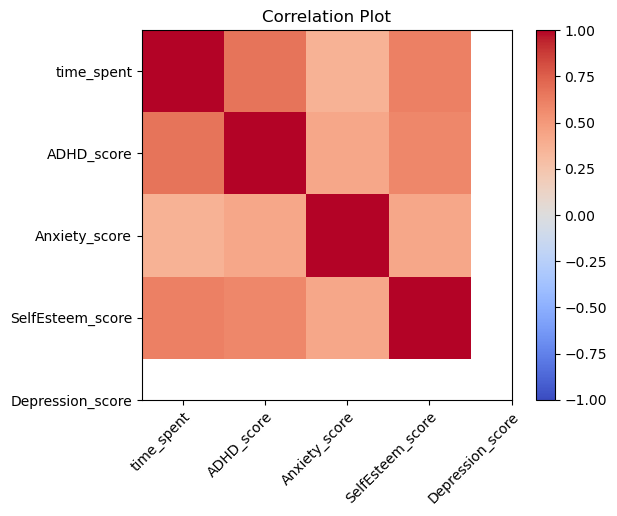

In [20]:
# Correlation matrix
selected_columns = ['time_spent', 'ADHD_score', 'Anxiety_score', 'SelfEsteem_score', 'Depression_score']
corr_matrix = dat1[selected_columns].corr()


# Create a figure and axis
fig, ax = plt.subplots()

# Create a correlation plot using Matplotlib's imshow function
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = fig.colorbar(cax)

# Set the labels and title
ax.set_xticks(np.arange(len(selected_columns)))
ax.set_yticks(np.arange(len(selected_columns)))
ax.set_xticklabels(selected_columns)
ax.set_yticklabels(selected_columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Correlation Plot')

# Show the plot
plt.savefig('correlationPlot.png')
plt.show()

## Linear Regression Models